# Week 7 - HMM Implementation

We're going to look at heart rate measurements made over the course of a day, when the subject slept, generally rested, and also went cycling.

In [1]:
%matplotlib inline
import numpy as np
from hmmlearn.hmm import GaussianHMM as GaussianHMM
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

hr = (np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 47, 46, 45, 45, 45, 63, 63, 48, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 46, 47, 48, 49, 49, 49, 42, 42, 42, 42, 42, 42, 46, 49, 52, 58, 58, 58, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 47, 49, 49, 49, 47, 46, 45, 45, 45, 45, 56, 56, 56, 49, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 45, 45, 45, 49, 49, 49, 49, 49, 49, 43, 43, 43, 44, 44, 44, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 49, 49, 49, 45, 45, 45, 52, 52, 52, 46, 45, 44, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 46, 46, 46, 48, 48, 48, 47, 47, 47, 47, 48, 49, 50, 50, 50, 48, 48, 48, 49, 49, 49, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 46, 46, 46, 44, 44, 44, 48, 48, 48, 47, 46, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 54, 54, 54, 43, 43, 43, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43, 43, 43, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 49, 51, 54, 54, 54, 46, 46, 46, 47, 47, 47, 46, 46, 46, 47, 47, 47, 45, 45, 45, 49, 49, 49, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 51, 51, 51, 45, 45, 45, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 48, 50, 55, 55, 55, 48, 47, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 49, 50, 53, 53, 53, 50, 50, 50, 53, 53, 53, 50, 49, 48, 48, 48, 48, 69, 69, 69, 62, 58, 54, 50, 50, 50, 50, 50, 50, 50, 50, 50, 53, 53, 53, 49, 49, 49, 50, 51, 52, 55, 55, 55, 52, 51, 50, 50, 50, 50, 50, 50, 50, 59, 59, 67, 67, 68, 68, 68, 60, 60, 60, 95, 95, 95, 90, 90, 90, 114, 125, 136, 144, 144, 144, 136, 135, 134, 134, 134, 134, 145, 145, 145, 127, 127, 127, 131, 135, 139, 147, 147, 147, 133, 128, 123, 125, 121, 117, 106, 106, 106, 126, 132, 138, 136, 138, 140, 141, 141, 141, 139, 139, 139, 140, 141, 142, 141, 142, 143, 155, 155, 155, 153, 152, 151, 148, 148, 148, 156, 156, 156, 154, 152, 150, 149, 148, 147, 146, 145, 144, 142, 141, 140, 139, 139, 139, 139, 139, 139, 143, 143, 143, 142, 141, 140, 139, 139, 139, 139, 139, 139, 142, 143, 144, 145, 145, 145, 125, 125, 125, 147, 147, 147, 146, 144, 142, 136, 136, 136, 142, 142, 142, 142, 142, 142, 133, 126, 119, 113, 107, 101, 94, 94, 94, 94, 95, 96, 95, 100, 105, 132, 136, 140, 140, 140, 140, 139, 136, 133, 126, 126, 126, 141, 142, 143, 143, 143, 143, 143, 144, 145, 145, 147, 149, 153, 153, 153, 132, 120, 108, 91, 91, 91, 91, 98, 105, 128, 135, 142, 142, 142, 142, 138, 136, 134, 134, 134, 134, 144, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 149, 149, 149, 146, 146, 146, 147, 148, 149, 153, 153, 153, 153, 153, 153, 152, 151, 150, 150, 149, 148, 149, 147, 145, 132, 125, 118, 114, 114, 114, 140, 140, 140, 138, 135, 132, 127, 123, 119, 117, 115, 113, 114, 111, 108, 100, 100, 100, 100, 100, 100, 98, 98, 98, 105, 105, 105, 105, 105, 105, 112, 112, 112, 101, 97, 93, 91, 91, 91, 104, 104, 104, 99, 99, 99, 99, 103, 107, 134, 134, 134, 133, 133, 133, 133, 135, 137, 147, 147, 147, 144, 144, 144, 151, 151, 151, 149, 148, 147, 146, 146, 146, 146, 146, 146, 145, 138, 131, 115, 112, 109, 109, 109, 88, 88, 81, 81, 81, 85, 90, 95, 106, 106, 106, 84, 84, 84, 94, 98, 102, 103, 103, 103, 78, 74, 70, 70, 70, 70, 78, 78, 78, 78, 77, 76, 74, 74, 74, 75, 75, 75, 75, 75, 75, 93, 93, 93, 83, 83, 83, 85, 85, 71, 71, 63, 63, 63, 79, 79, 79, 66, 63, 60, 60, 60, 60, 60, 61, 62, 63, 63, 63, 62, 62, 62, 63, 64, 65, 65, 65, 65, 62, 62, 62, 69, 72, 75, 72, 76, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 86, 81, 76, 74, 71, 68, 66, 64, 62, 63, 62, 61, 60, 60, 60, 60, 62, 64, 76, 76, 76, 70, 68, 66, 65, 65, 65, 71, 71, 71, 71, 69, 67, 62, 62, 62, 74, 74, 74, 74, 74, 74, 74, 72, 70, 66, 65, 64, 64, 64, 64, 80, 84, 88, 88, 88, 88, 88, 88, 88, 82, 79, 76, 78, 75, 72, 65, 64, 63, 63, 63, 63, 64, 64, 64, 63, 63, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 63, 63, 63, 66, 72, 78, 94, 94, 94, 92, 92, 92, 92, 92, 92, 83, 83, 83, 88, 88, 88, 81, 78, 75, 74, 74, 74, 75, 75, 75, 71, 69, 67, 68, 67, 66, 67, 66, 65, 62, 62, 62, 65, 65, 65, 65, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 62, 65, 68, 77, 77, 77, 58, 58, 58, 58, 62, 66, 89, 89, 89, 88, 88, 78, 78, 78, 78, 78, 60, 60, 60, 60, 60, 60, 56, 56, 56, 57, 57, 57, 55, 55, 55, 55, 56, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 58, 58, 58, 58, 58, 60, 60, 60, 59, 58, 57, 56, 56, 56, 61, 61, 61, 59, 59, 59, 62, 62, 62, 62, 61, 60, 59, 59, 59, 76, 76, 76, 76, 73, 70, 57, 57, 57, 59, 59, 59, 59, 59, 59, 56, 56, 56, 62, 62, 62, 59, 57, 55, 54, 54, 54, 55, 56, 57, 56, 57, 58, 60, 60, 60, 56, 56, 56, 62, 66, 70, 77, 77, 77, 66, 62, 58, 58, 58, 58, 58, 58, 58, 57, 56, 55, 54, 54, 54, 54, 55, 56, 56, 57, 58, 59, 60, 61, 61, 61, 61, 55, 55, 55, 58, 58, 58, 56, 56, 56, 58, 61, 64, 69, 69, 69, 55, 55, 55, 68, 68, 68, 58, 57, 56, 56, 56, 56, 55, 55, 55, 56, 59, 62, 68, 68, 68, 66, 64, 62, 58, 56, 54, 54, 54, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 60, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 62, 66, 66, 66, 59, 58, 57, 58, 57, 56, 55, 55, 55, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 61, 66, 66, 66, 63, 62, 61, 60, 60, 60, 62, 62, 62, 59, 59, 59, 59, 59, 59, 61, 61, 61, 59, 59, 59, 59, 60, 61, 66, 70, 74, 82, 82, 82, 55, 55, 55, 55, 55, 55, 56, 57, 58, 57, 61, 65, 82, 82, 82, 59, 56, 53, 53, 53, 53, 53, 54, 55, 56, 56, 56, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 61, 60, 57, 57, 57, 68, 68, 68, 63, 63, 63, 63, 63, 63, 60, 60, 60, 65, 65, 65, 62, 62, 62, 66, 66, 66, 63, 63, 63, 71, 71, 71, 60, 60, 60, 60, 60, 60, 59, 59, 59, 61, 61, 61, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 63, 63, 63, 61, 61, 61, 62, 62, 62, 62, 61, 60, 59, 59, 59, 60, 60, 60, 59, 59, 59, 58, 58, 58, 57, 57, 57, 57, 57, 57, 59, 60, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 61, 62, 63, 63, 63, 63, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 62, 63, 62, 63, 64, 89, 89, 89, 81, 78, 75, 74, 74, 74, 79, 81, 83, 83, 83, 83, 83, 81, 79, 73, 70, 67, 64, 64, 64, 64, 64, 64, 62, 62, 62, 65, 65, 65, 64, 64, 64, 63, 63, 63, 64, 64, 64, 62, 61, 60, 60, 60, 60, 61, 64, 67, 70, 74, 78, 83, 83, 83, 60, 60, 60, 63, 63, 63, 61, 61, 61, 69, 69, 69, 64, 63, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 60, 60, 60, 58, 58, 58, 61, 62, 63, 63, 65, 67, 74, 74, 74, 67, 67, 67, 69, 73, 77, 80, 86, 92, 104, 104, 104, 95, 90, 85, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 76, 74, 71, 71, 71, 73, 73, 73, 68, 65, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 54, 54, 54, 59, 59, 59, 57, 57, 57, 57, 57, 57, 58, 58, 58, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 61, 61, 57, 57, 57, 59, 59, 59, 58, 58, 58, 58, 58, 58, 52, 52, 52, 70, 70, 70, 70, 70, 70, 67, 66, 65, 64, 63, 62, 63, 62, 61, 54, 54, 54, 57, 57, 57, 57, 57, 57, 56, 55, 54, 52, 52, 52, 56, 56, 56, 56, 56, 56, 55, 55, 55, 61, 61, 61, 61, 61, 61, 64, 65, 66, 67, 67, 67, 50, 49, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 52, 52, 53, 54, 55, 56, 57, 60, 60, 60, 56, 55, 54, 55, 54, 53, 52, 52, 52, 56, 56, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 58, 58, 58, 50, 50, 50, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 49, 49, 49, 49, 49, 49, 50, 52, 54, 60, 60, 60, 50, 49, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48], dtype=np.float64))

#### (1) Load the data and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

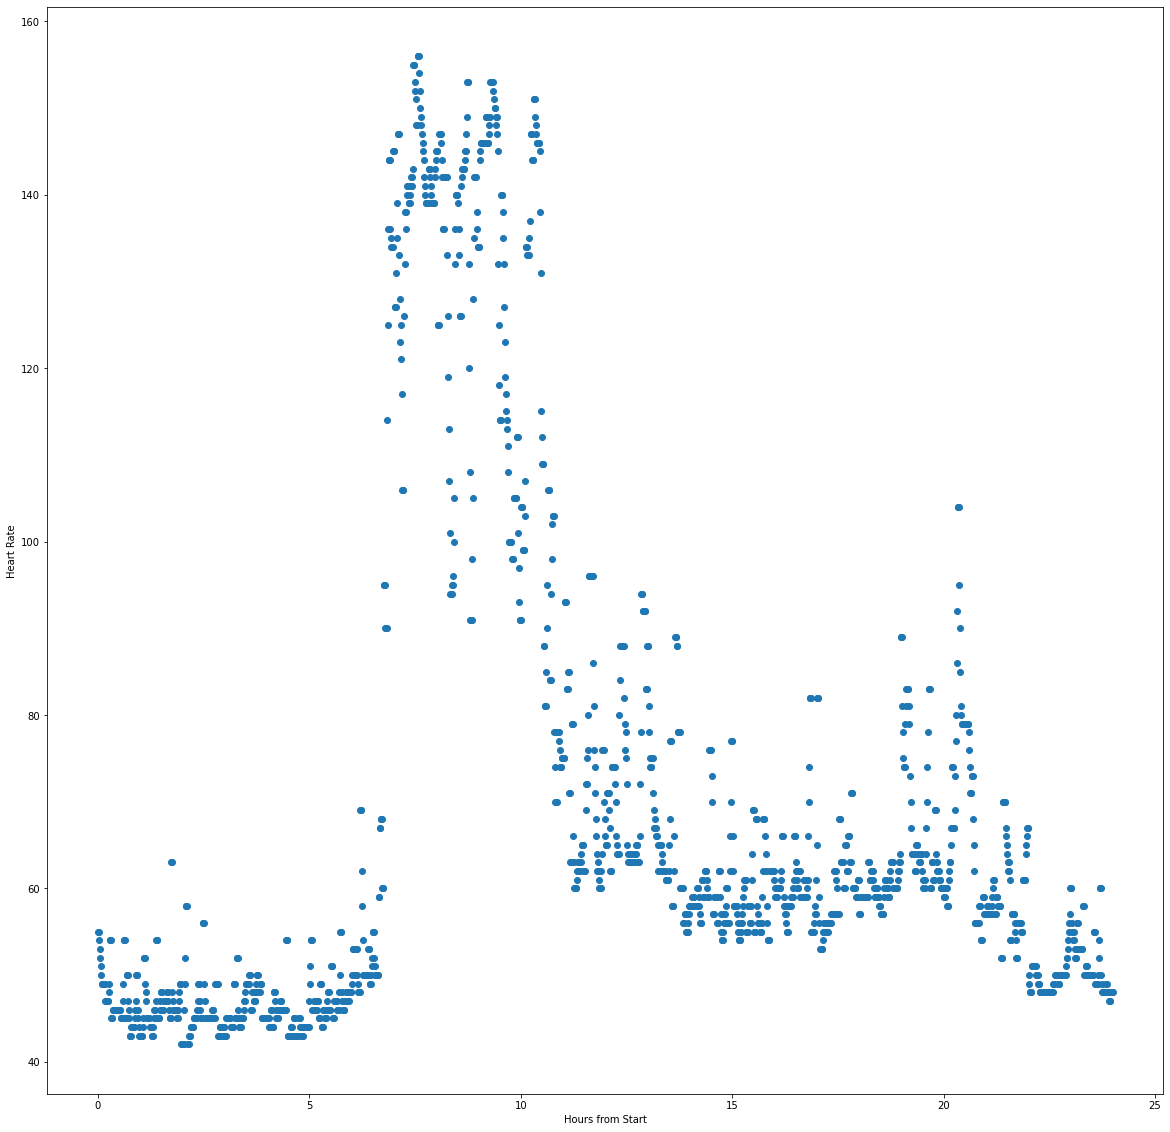

In [2]:
# Answer
#print(np.size(hr))

d_time = np.linspace(0,(24) , 1974) 
#print(np.size(d_time))
fig = plt.figure(figsize = (20,20))
plt.scatter(d_time, hr);
plt.ylabel("Heart Rate")
plt.xlabel("Hours from Start");

#### (2) Do you see regions where there might be differences in behavior?

Answer.
Yes, I see five distinct regions where groupings of behavior could be inferred. Where heart rate looks to be gouped into similair sections, and could be due to different activity. Three sections is probably the easisest to classify and there are definetly three classes of behavior in the data. Very low heart rate, middle heart rate, about 60 and very high hr.

#### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

The simplest emissions to use with `hmmlearn` are Gaussian ones. If our emissions are not Gaussian, we can still transform our data in some way to make it look more like a normal distribution. Given the shape of this distribution, do you think any transformation of the data would be helpful? Justify your answer.

test stat norm:  0.17494545086995145
pvalue kstest norm:  1.0135916308516134e-13
0.17494545086995145
1.0135916308516134e-13

test stat lognorm 0.1673843139018042
pvalue lognorm 1.3656228061059223e-12
0.1673843139018037
1.3656228061061518e-12


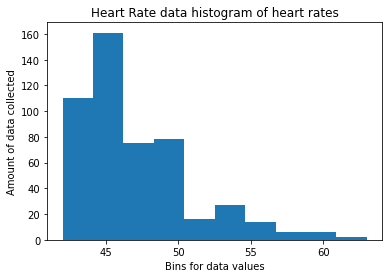

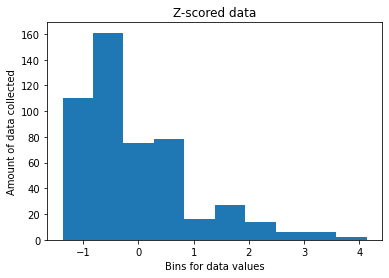

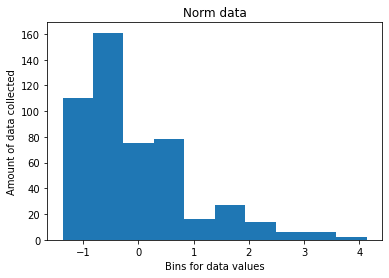

In [3]:
# Answer

sleep_time_mid_500 = np.where(d_time <= 5)
sleep_vals_mid_500 = hr[:np.size(sleep_time_mid_500)]
sleep_time_23_mid = np.where(d_time >= 23)
sleep_vals_23_mid = hr[(sleep_time_23_mid[0][0]):]

rest_times = ((d_time >12) & (d_time < 19))
rest_vals= hr[rest_times]

act_times = ((d_time >7) & (d_time <10))
act_vals = hr[act_times]
#rest_time2 = np.where(rest_time1<19)
#rest_time = np.concatenate((rest_time1, rest_time2))
#rest_vals = hr[rest_time[0]:np.size(rest_time)]



est_sleep_times = np.concatenate((sleep_vals_mid_500, sleep_vals_23_mid))

zs_est_sleep_times = stats.zscore(est_sleep_times)

normalized_times = (est_sleep_times - np.mean(est_sleep_times)) / np.std(est_sleep_times)



plt.hist(est_sleep_times);
plt.title("Heart Rate data histogram of heart rates")
plt.ylabel("Amount of data collected")
plt.xlabel("Bins for data values")

plt.figure()
plt.hist(zs_est_sleep_times)
plt.title("Z-scored data")
plt.ylabel("Amount of data collected")
plt.xlabel("Bins for data values");

plt.figure()
plt.hist(normalized_times)
plt.title("Norm data")
plt.ylabel("Amount of data collected")
plt.xlabel("Bins for data values");



mean = np.mean(est_sleep_times)
std = np.std(est_sleep_times)
stat4, p4 = stats.kstest(est_sleep_times, 'norm', args =(mean ,std ),alternative='two-sided')
stat2, p2 = stats.kstest(normalized_times, 'norm', alternative='two-sided')

###################################################

sigma, loc, scale = stats.lognorm.fit(est_sleep_times, floc=0)
stat, p = stats.kstest(est_sleep_times, 'lognorm', args=(sigma, loc, scale), alternative='two-sided')

log_sleep_vals = np.log(est_sleep_times)
mean2 = np.mean(log_sleep_vals)
std2 = np.std(log_sleep_vals)
stat3, p3 = stats.kstest(log_sleep_vals, 'norm', args =(mean2 ,std2),alternative='two-sided')

print('test stat norm: ', stat4)
print('pvalue kstest norm: ' ,p4)
print(stat2)
print(p2)

print()
print('test stat lognorm', stat)
print('pvalue lognorm', p)
print(stat3)
print(p3)






The histogram of the distribution does not look gaussian on it's own, however, it does appear to be close to a log normal distribution when looking at the original histogram. Comapring the log normal and normal ks test pvalues show that log normal is a slighlty better choice for these distributions. 


We could bootstrap areas thought to be in different to create a distribution of the sample means for each category. The mean of that distribution would be a good estimate of the the true mean of the each category and could be used as a prior parameter in the GaussianHMM model.

We could then zscale it, so that the new distribution mean is set to 0 and has 1 std. Because of the central limit theorem, this distribution will tend to gaussian.

#### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

Hint: Look at the points with a sharp transition. What does the moving average do here?

The moving average helps to smooth out the data and give good indications for long trends of the data, especially when we increase the neighbors to the moving average and take into account more data when averaging.
This large trend is good for visualizing the data, but we do lose spikes and small time/instantaneous data that may be important
As you can see in the plots below, the moving average taking into account only one neighbor looks very similair to the orginal data and there are areas where values spike
As we increase the range of the moving avergage these spikes disapear, and it is easier to categorize the data, however, some of those spikes got moved closer to the data around them which takes away some of our knowledge of the actual data
We want to categorize the entire data, it may be important that even for a short time the heart rate was spiked, and by using a moving average we will have depressed that spike, and vice versa with a droop
This can lead to misclassification of 

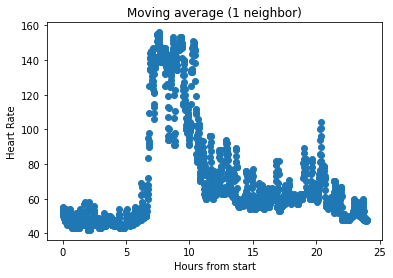

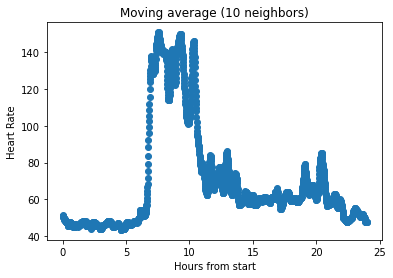

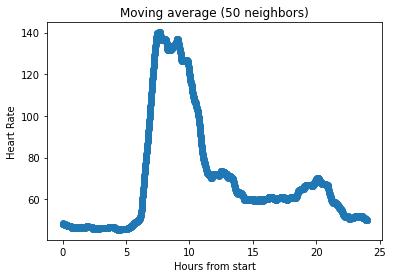

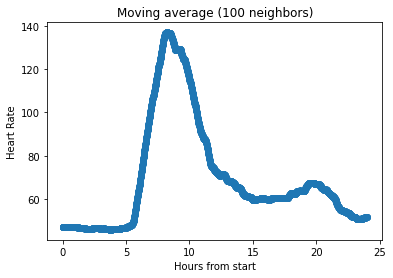

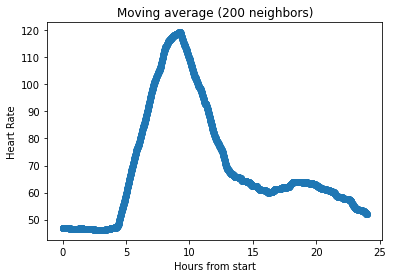

In [4]:
# Answer
def SMA(data, period):
    data_size = len(data)
    arr_avg = np.zeros(data_size)
    
    
    for i in range (0, data_size):
        if i == 0:
            cum_sum = np.sum(data[:i+period+1 ])                   
            move_avg_p = cum_sum / (period+1)
            arr_avg[i]= move_avg_p
        
        elif i == (data_size - 1): 
            cum_sum = np.sum(data[i-period:])                   
            move_avg_p = cum_sum / (period+1)
            arr_avg[i] = move_avg_p
        else:
            if i - period < 0 and i + period < data_size - 1:
                diff = period - i
                left_period = period - diff
                cum_sum = np.sum(data[i-left_period:i+period+1 ])
                move_avg_p = cum_sum / (left_period+period+1)                   
                arr_avg[i]= move_avg_p

            elif i + period > data_size - 1 and i - period > 0: 
                diff = (data_size - i)
                right_period = diff
                #print(right_period)
                
                #print(i-period)
                cum_sum = np.sum(data[i-period:i+right_period ])
                move_avg_p = cum_sum / (right_period+(period)) 
                #print(cum_sum)
                arr_avg[i]= move_avg_p
            
            elif i + period > data_size - 1 and i - period < 0:
                diff1 = period - i
                left_period = period - diff1
                diff2 = (data_size - i)
                right_period = diff2
                cum_sum = np.sum(data[i-left_period:i+right_period ])
                print(cum_sum)
                move_avg_p = cum_sum / (right_period+left_period)
                arr_avg[i]= move_avg_p
                                    
            else:
                cum_sum = np.sum(data[i-period:i+period+1 ]) 
                move_avg_p = cum_sum / (period+period+1)
                arr_avg[i] = move_avg_p
        
        #print(arr_avg)
    
    return arr_avg
moving_avg_vals = SMA(hr, 50)

#print(hr)

plt.figure()
plt.scatter(d_time, SMA(hr, 1))
plt.title("Moving average (1 neighbor)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

plt.figure()
plt.scatter(d_time, SMA(hr, 10))
plt.title("Moving average (10 neighbors)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

plt.figure()
plt.scatter(d_time, moving_avg_vals )
plt.title("Moving average (50 neighbors)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

plt.figure()
plt.scatter(d_time, SMA(hr, 100))
plt.title("Moving average (100 neighbors)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

plt.figure()
plt.scatter(d_time, SMA(hr, 200))
plt.title("Moving average (200 neighbors)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

print("The moving average helps to smooth out the data and give good indications for long trends of the data, especially when we increase the neighbors to the moving average and take into account more data when averaging.")
print("This large trend is good for visualizing the data, but we do lose spikes and small time/instantaneous data that may be important")
print("As you can see in the plots below, the moving average taking into account only one neighbor looks very similair to the orginal data and there are areas where values spike")
print("As we increase the range of the moving avergage these spikes disapear, and it is easier to categorize the data, however, some of those spikes got moved closer to the data around them which takes away some of our knowledge of the actual data")
print("We want to categorize the entire data, it may be important that even for a short time the heart rate was spiked, and by using a moving average we will have depressed that spike, and vice versa with a droop")
print("This can lead to misclassification of certain areas of data.")



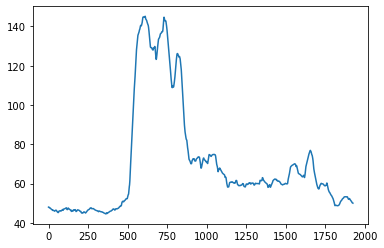

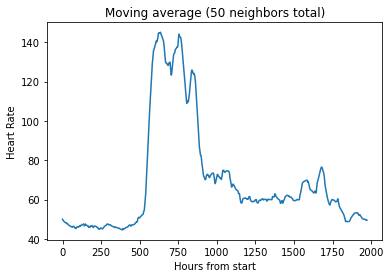

In [5]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    #print(weights)
    #plt.plot(np.convolve(weights, np.squeeze(values), 'valid'))

    return np.convolve(np.squeeze(values), weights, 'valid')

plt.plot(movingaverage(hr, 50));
plt.figure()

plt.plot(SMA(hr, 25))
plt.title("Moving average (50 neighbors total)")
plt.ylabel("Heart Rate")
plt.xlabel("Hours from start");

#### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

Answer.
The parameters I would set would be anything below 55 would be sleep, between 55 and 75 would be at rest, and above 75 would be active. 
The sleep state would determine when the subject is at a state where the are actually asleep, meaning the hr is slow enough to indicate the body in recovery mode perse.
The rest state would indicate the person is awake and performing activity, but not in a state of exertion physically.
The active state would indicate a person who is awake and performing physically demaniding activities.

Some parameters about these would be the transmission probabilities, the probability of going from any one state to another state as time/observations continue, emmission probability, the probability that the state you observe is actually that state. The prior probability, the parameter stating at what posibility does the model start in any given state.


#### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

How does the model respond to rapid state changes? Overlay the raw measurements and HMM state over time.

(array([ 52., 159.,  99.,  84.,  34.,  23.,  23.,  13.,   6.,   2.]),
 array([3.73766962, 3.77821613, 3.81876264, 3.85930915, 3.89985566,
        3.94040217, 3.98094868, 4.02149519, 4.0620417 , 4.10258822,
        4.14313473]),
 <BarContainer object of 10 artists>)

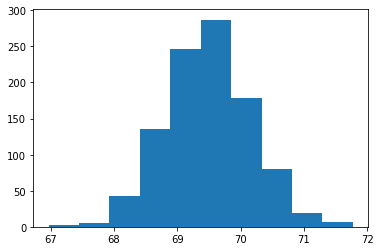

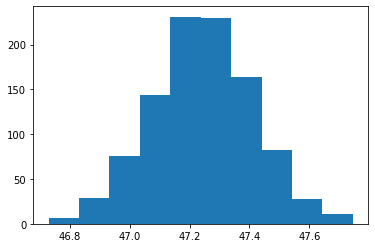

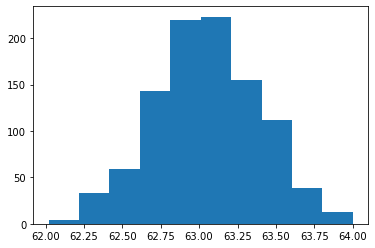

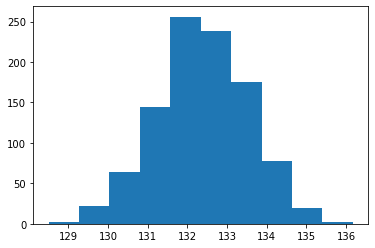

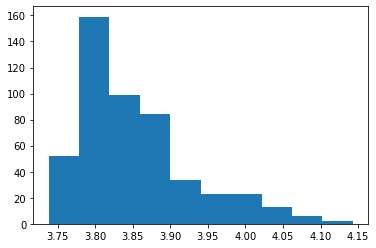

In [6]:
# Answer




from sklearn.utils import resample
sleep_time_mid_500 = np.where(d_time <= 5)
sleep_vals_mid_500 = hr[:np.size(sleep_time_mid_500)]
sleep_time_23_mid = np.where(d_time >= 23)
sleep_vals_23_mid = hr[(sleep_time_23_mid[0][0]):]

est_sleep_times = np.concatenate((sleep_vals_mid_500, sleep_vals_23_mid))

zs_est_sleep_times = stats.zscore(est_sleep_times)

normalized_times = (est_sleep_times - np.mean(est_sleep_times)) / np.std(est_sleep_times)

log_sleep_vals = np.log(est_sleep_times)
log_act_vals = np.log(act_vals)
log_rest_vals = np.log(rest_vals)

log_hr_all_vals = np.log(hr)


def bootstrap(dist, est_sleep, est_rest, est_act, runs):
    boot_dist = []
    boot_sleep = []
    boot_act = []
    boot_rest = []
    for j in range(0, runs+1):
        act_samp = resample(est_act)
        rest_samp = resample(est_rest)
        sleep_samp = resample(est_sleep)
        hr_samp = resample(dist)
        
        rest_samp_mean = np.mean(rest_samp)
        act_samp_mean = np.mean(act_samp)
        hr_samp_mean = np.mean(hr_samp)
        sleep_samp_mean = np.mean(sleep_samp)
        
        boot_act.append(act_samp_mean)
        boot_rest.append(rest_samp_mean)
        boot_dist.append(hr_samp_mean)
        boot_sleep.append(sleep_samp_mean)
        
    return(boot_dist, boot_sleep, boot_rest, boot_act)

boot_hr, boot_sleep, boot_rest, boot_act = bootstrap(hr, est_sleep_times,rest_vals, act_vals, 1000);

boot_hr_log, boot_sleep_log, boot_rest_log, boot_act_log = bootstrap(log_hr_all_vals, log_sleep_vals,log_rest_vals, log_act_vals, 1000);

plt.hist(boot_hr)
plt.figure()
plt.hist(boot_sleep)
plt.figure()
plt.hist(boot_rest)
plt.figure()
plt.hist(boot_act)

rest_mean = np.mean(boot_rest)
act_mean = np.mean(boot_act)
sleep_mean = np.mean(boot_sleep)

rest_mean_log = np.mean(boot_rest_log)
act_mean_log = np.mean(boot_act_log)
sleep_mean_log = np.mean(boot_sleep_log)

mean_array = [sleep_mean,rest_mean, act_mean]
log_mean_array= [sleep_mean_log,rest_mean_log, act_mean_log]

log_sleep_vals = np.log(est_sleep_times)
plt.figure()
plt.hist(log_sleep_vals)






HMM model state showing sleep:  2
HMM model state showing rest: 0
HMM model state showing activity: 1
[60 60 60 ... 47 47 47]


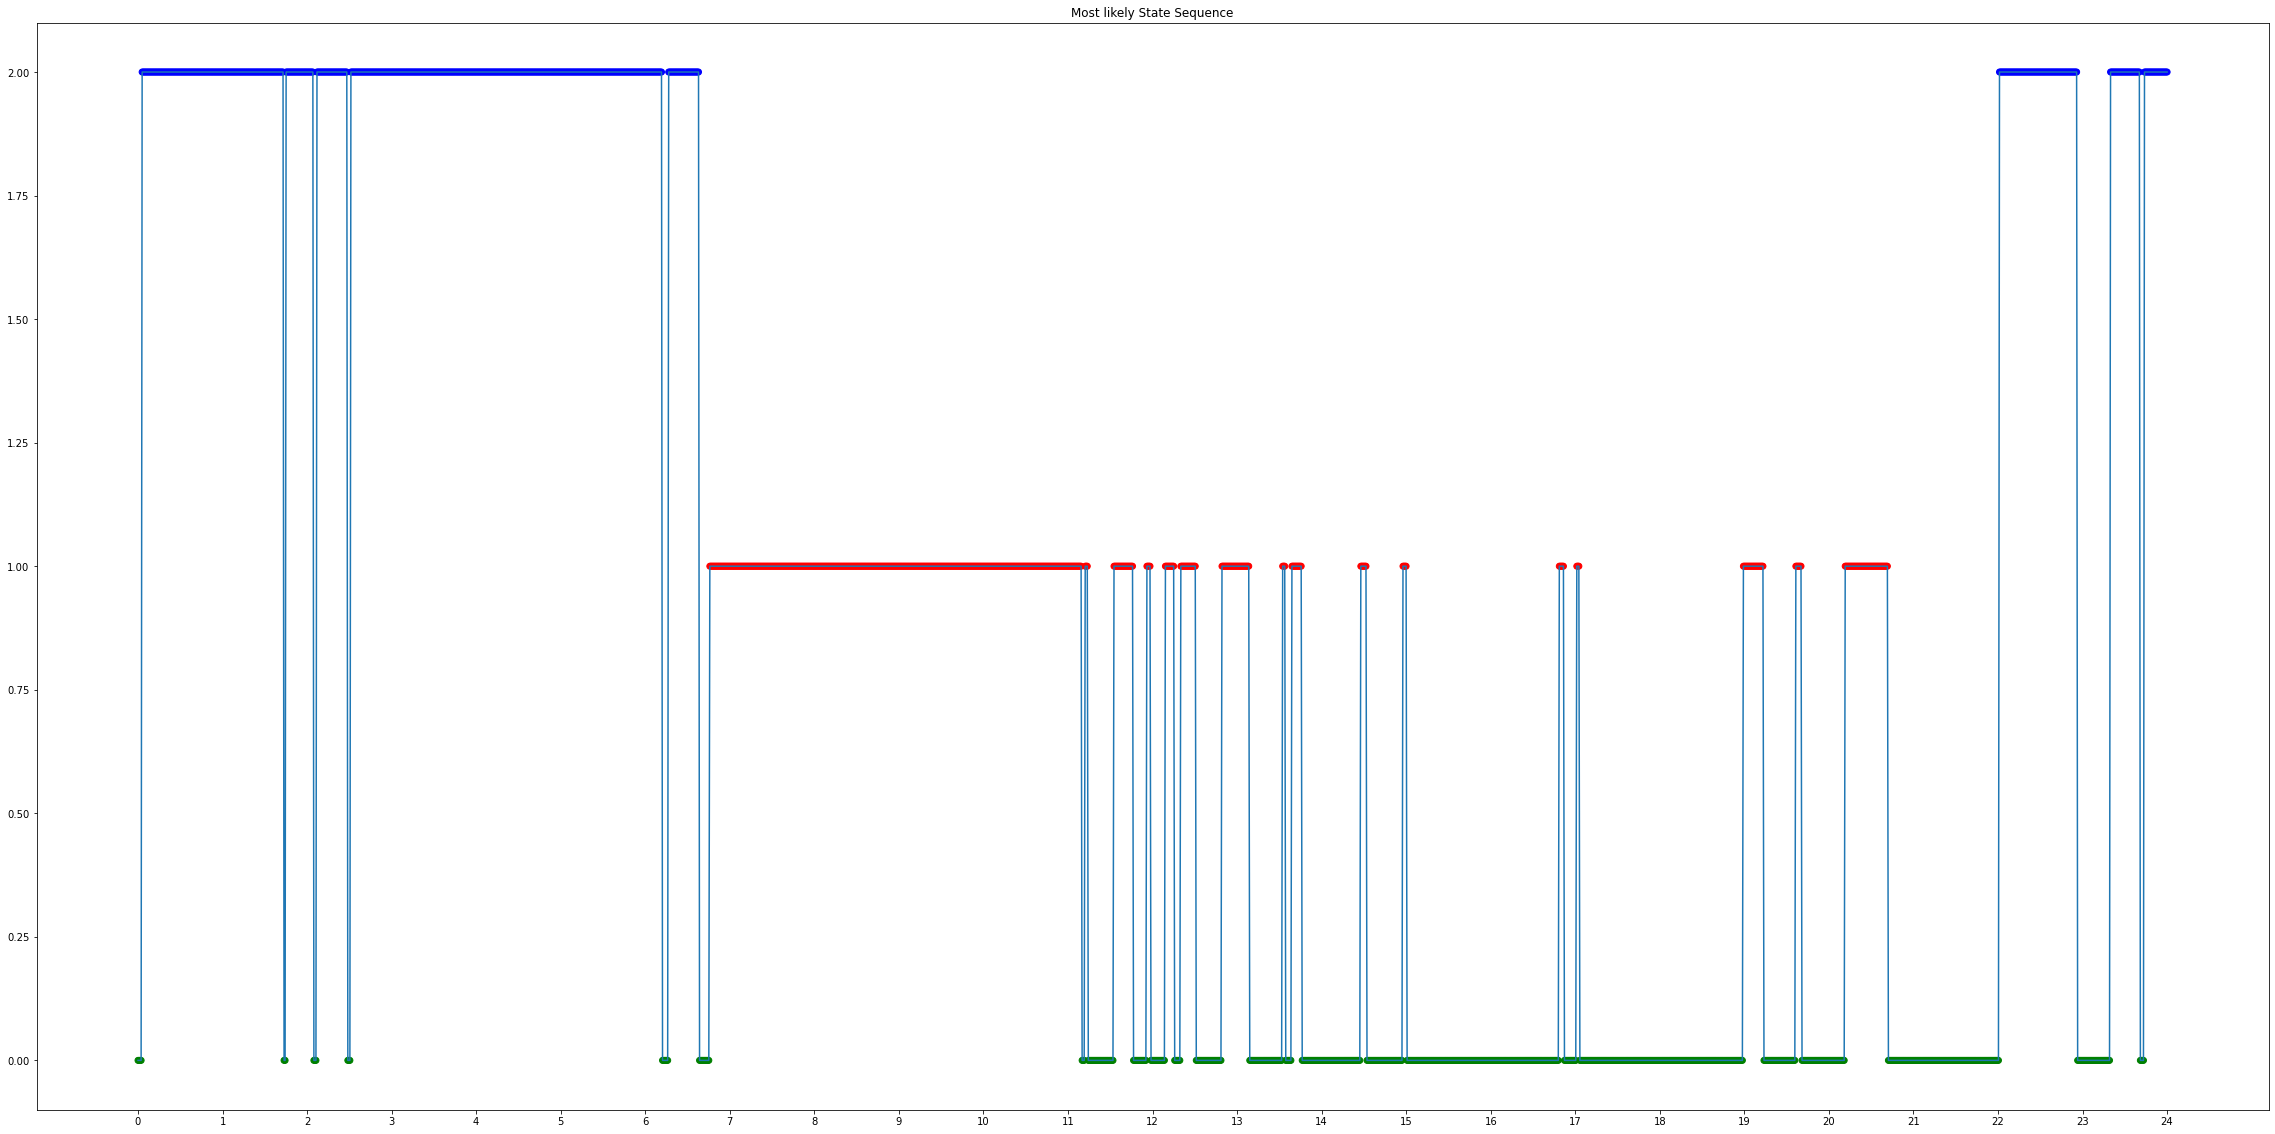

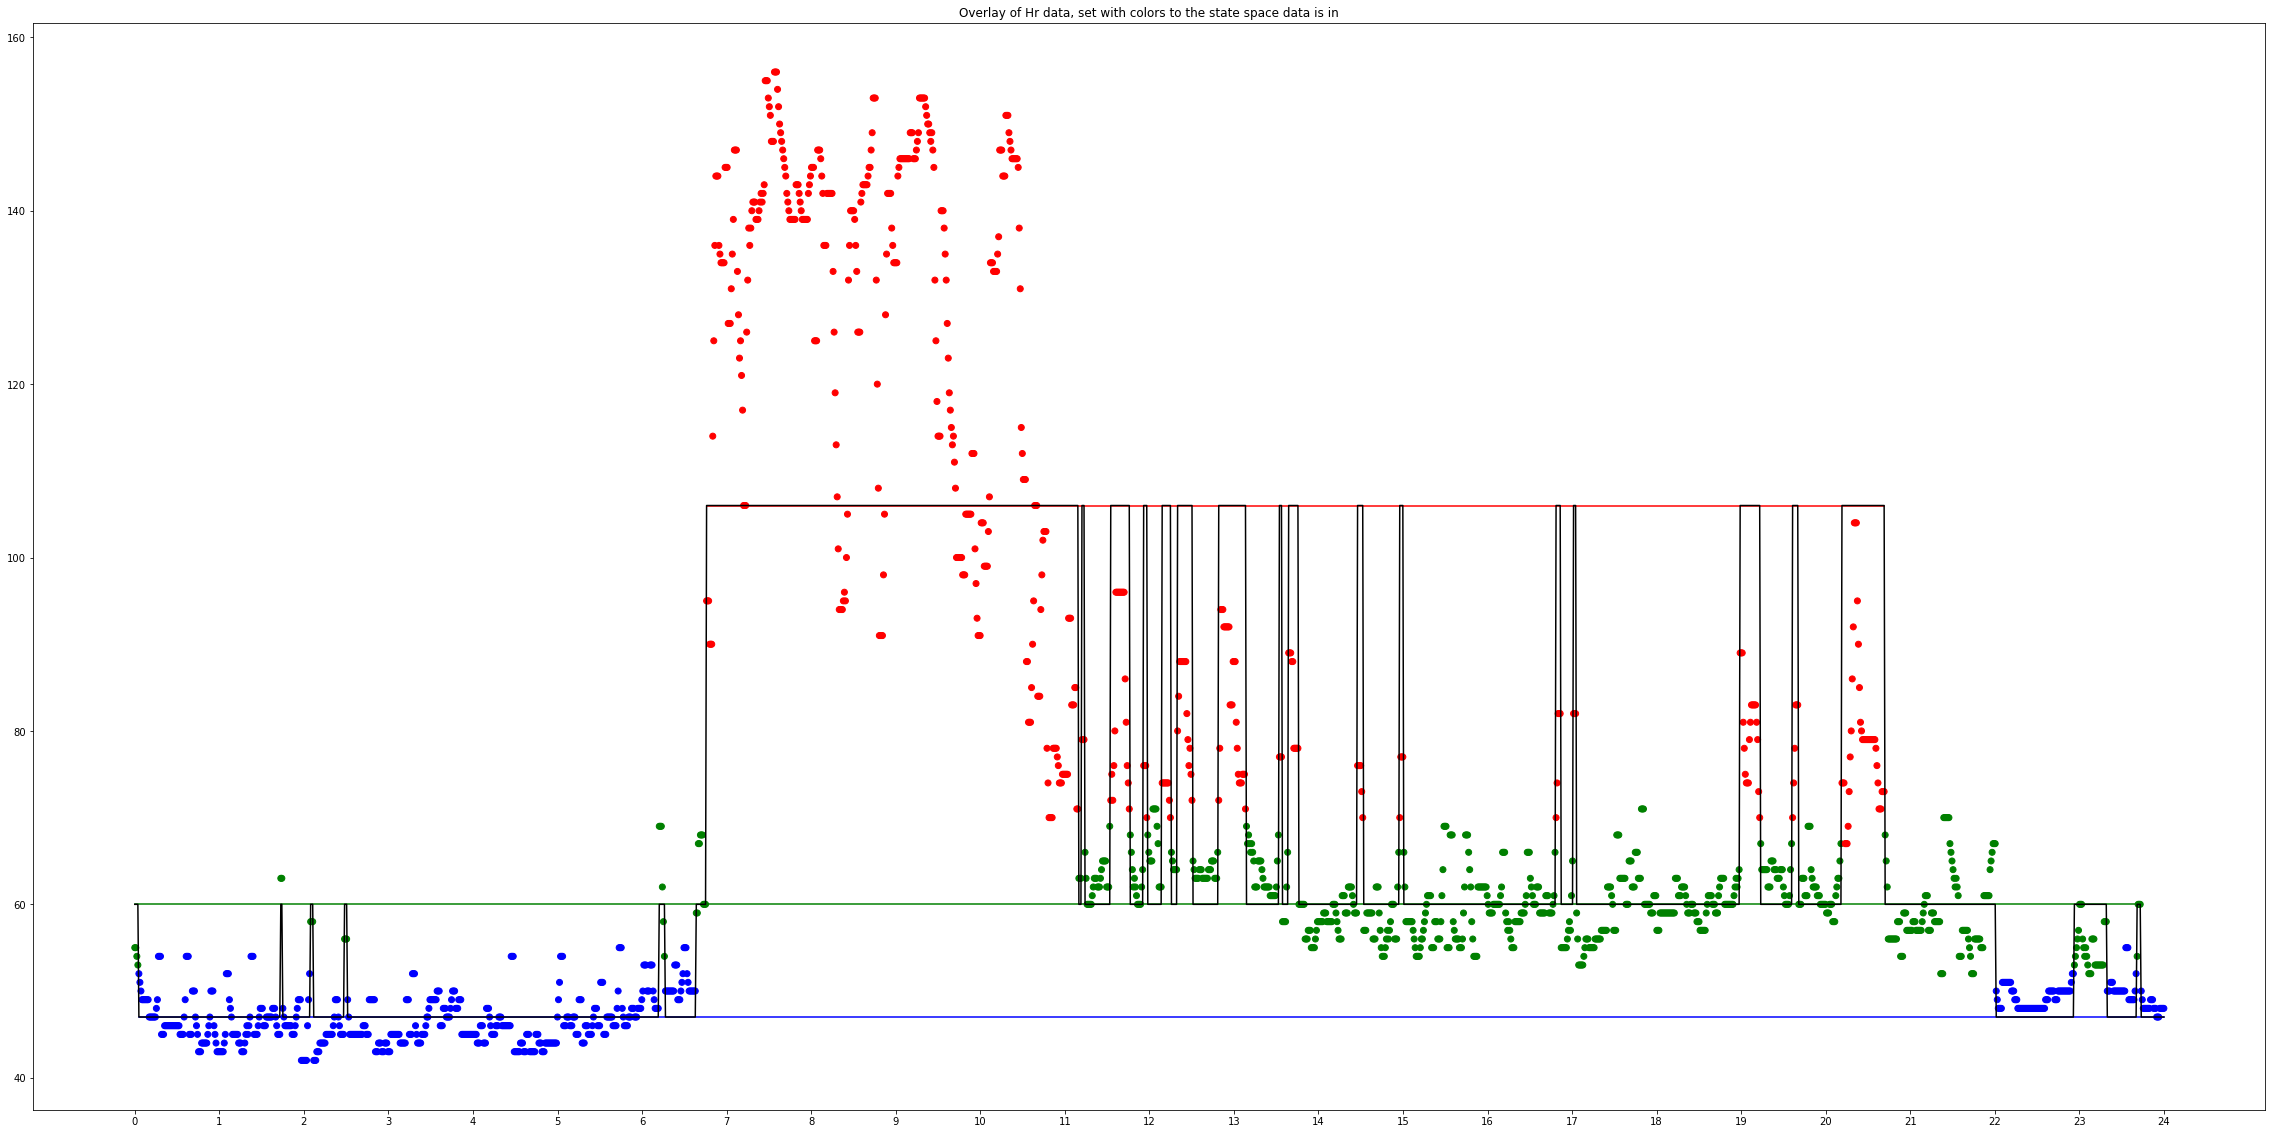

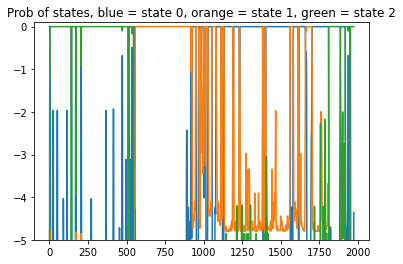

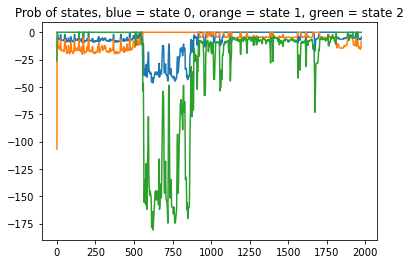

In [7]:
hr_log_reshape = np.reshape(log_hr_all_vals, (-1,1))
mean_arr_log = np.reshape(log_mean_array, (-1,1))
#print(mean_arr_log)
modelPred_log = GaussianHMM(n_components=3,covariance_type = "full" ,means_prior = mean_arr_log, n_iter=10000000, tol=0.0000001)
#modelPred_log = GaussianHMM(n_components=3,n_iter=100000000, tol=0.000000001)
modelPred_log.fit(hr_log_reshape)
hidden_states_log = modelPred_log.predict(hr_log_reshape)
mean_list = []
#print(modelPred_log.means_)

for k in range(0, np.size(modelPred_log.means_)):
    if modelPred_log.means_[k] < 3.9:
        state_sleep = k
        
    elif modelPred_log.means_[k] > 4.5:
        state_act = k
    else:
        state_rest = k

print("HMM model state showing sleep: ",state_sleep)
print("HMM model state showing rest:" ,state_rest)
print("HMM model state showing activity:" ,state_act)

hidden_state_mean_2 = hidden_states_log
hidden_state_mean_2[hidden_state_mean_2 == state_sleep] = math.e**modelPred_log.means_[state_sleep]
hidden_state_mean_2[hidden_state_mean_2 == state_rest] = math.e**modelPred_log.means_[state_rest]
hidden_state_mean_2[hidden_state_mean_2 == state_act] = math.e**modelPred_log.means_[state_act]


print(hidden_state_mean_2)


hidden_states_log = modelPred_log.predict(hr_log_reshape)
sleep_time = d_time[hidden_states_log == state_sleep]
rest_time = d_time[hidden_states_log == state_rest]
act_time = d_time[hidden_states_log == state_act]

sleep_vals = hr[hidden_states_log == state_sleep]
rest_vals = hr[hidden_states_log == state_rest]
act_vals = hr[hidden_states_log == state_act]


col_arr_sleep = np.full_like(sleep_time, 'b',dtype = 'str')
val_arr_sleep = np.full_like(sleep_time, math.e**modelPred_log.means_[state_sleep], dtype = int)

col_arr_rest = np.full_like(rest_time, 'g', dtype = 'str')
val_arr_rest = np.full_like(rest_time, math.e**modelPred_log.means_[state_rest], dtype = int)

col_arr_act = np.full_like(act_time, 'r', dtype = 'str')
val_arr_act = np.full_like(act_time, math.e**modelPred_log.means_[state_act], dtype = int)
######################################################

col_arr = np.empty_like(d_time, dtype = 'str')

sleep_d = np.where(hidden_states_log == state_sleep)
col_arr[sleep_d] = 'b'


rest_d = np.where(hidden_states_log == state_rest)


col_arr[rest_d] = 'g'

act_d = np.where(hidden_states_log == state_act)

col_arr[act_d] = 'r'






    #else
    #print(math.e**k[0])
    #print(mean_array)


plt.figure(figsize = (40,20))
plt.plot(d_time, hidden_states_log)
plt.scatter(d_time,hidden_states_log, c = col_arr)
plt.title("Most likely State Sequence")
plt.xticks(np.arange(min(d_time), max(d_time)+1, 1.0))

plt.figure(figsize = (40,20))
plt.scatter(sleep_time, sleep_vals, c = col_arr_sleep)
plt.plot(sleep_time, val_arr_sleep, c = 'b')

plt.scatter(rest_time, rest_vals, c = col_arr_rest)
plt.plot(rest_time, val_arr_rest, c = 'g')

plt.scatter(act_time, act_vals, c = col_arr_act)
plt.plot(act_time, val_arr_act, c = 'r')
plt.xticks(np.arange(min(d_time), max(d_time)+1, 1.0))

plt.plot(d_time, hidden_state_mean_2, c = 'k')
plt.title("Overlay of Hr data, set with colors to the state space data is in")

stateP = modelPred_log.predict_proba(hr_log_reshape)
plt.figure()
plt.plot(np.log10(stateP));
plt.ylim(-5, 0.1);
plt.title("Prob of states, blue = state 0, orange = state 1, green = state 2")
plt.figure()
plt.plot(np.log10(stateP[:][:]));
plt.title("Prob of states, blue = state 0, orange = state 1, green = state 2");



This HMM model is able to detect rapid changes unlike the moving average, which smoothes out the transistion. This model catches almost instantaneous changes and can track them. The plot displays the quick jumps it makes, which helps it better predict the data.


#### (7) From the HMM model determine when you think the subject woke up in the morning. Compare this prediction to the data you obtain with the moving average.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

Most likely time to be awake is at time marker:  6.203750633552965


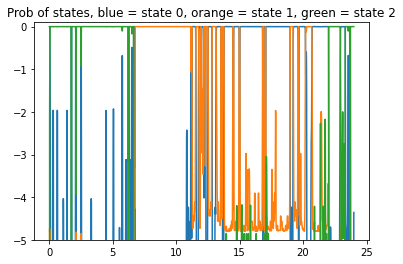

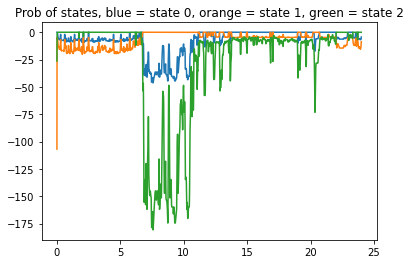

In [8]:
# Answer
stateP = modelPred_log.predict_proba(hr_log_reshape)
state_sleep
prob_sleep = []



likely_awake = []
for k in range (0, 1973):
    prob_sleep.append(stateP[k][state_sleep])
    if stateP[k][state_act] > stateP[k][state_sleep] and stateP[k][state_rest] > stateP[k][state_sleep]:
        likely_awake.append(d_time[k])
        
print("Most likely time to be awake is at time marker: ", likely_awake[0])
    
#print(np.log(prob_sleep))

#print(np.log(stateP))
plt.figure()
plt.plot(d_time, np.log10(stateP));
plt.ylim(-5, 0.1);
plt.title("Prob of states, blue = state 0, orange = state 1, green = state 2");
plt.figure()
plt.plot(d_time, np.log10(stateP[:][:]));
plt.title("Prob of states, blue = state 0, orange = state 1, green = state 2");






#### (8) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your HMM model?

Answer.
The average heart rate of the person wearing the watch, when sleeping, when awake at rest, and when active. It would also be helpful to have the this, so that we could create better prediction of the means of each state for the model.
It would also be good to know the average fluctuations in heart rate, and the stats that it is in during those fluctuations. This could help create a better transition matrix.
It would be good to know the accuracy of the bioelectric sensor/sensor being used, so that we could get a better estimate of the emmisions parameters. This could be used to determine if the actual emissions are normally distributed. 

[[3.85202803]
 [4.13608813]
 [4.87464326]]
1974
[2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 47.10526105]
 [110.4385989 ]
 [ 60.09625989]]


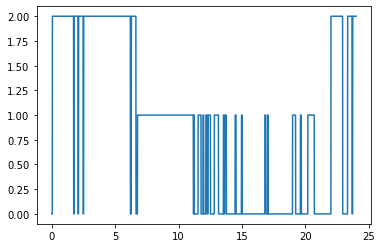

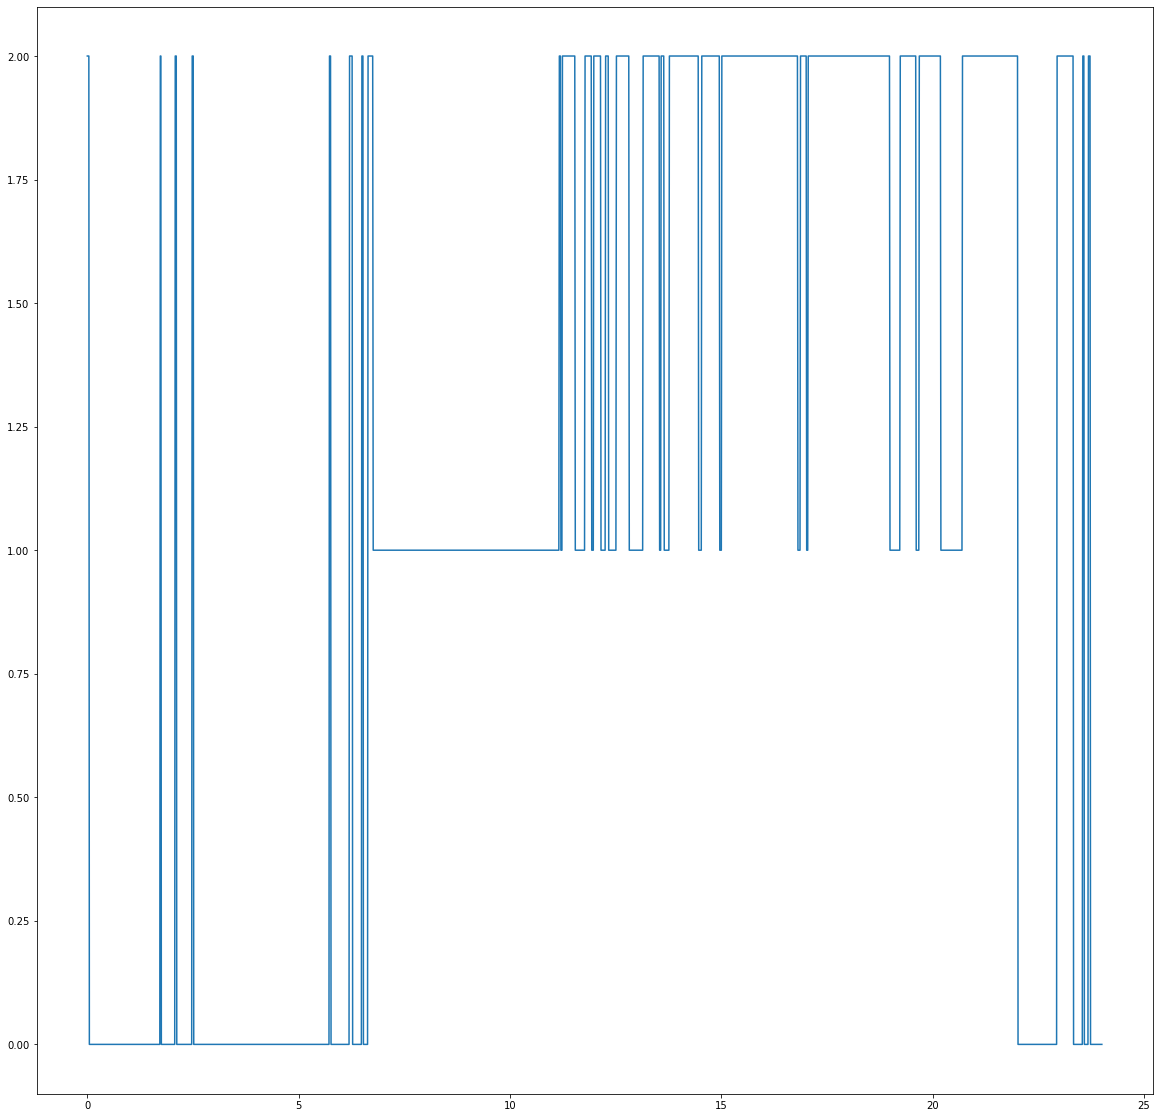

In [9]:
#Extra code that I used while answering questions
hr_log_reshape = np.reshape(log_hr_all_vals, (-1,1))
mean_arr_log = np.reshape(log_mean_array, (-1,1))
print(mean_arr_log)
modelPred_log = GaussianHMM(n_components=3,covariance_type = "full" ,means_prior = mean_arr_log, n_iter=100000, tol=0.00001)
modelPred_log.fit(hr_log_reshape)
hidden_states_log = modelPred_log.predict(hr_log_reshape)
plt.figure()
plt.plot(d_time,hidden_states_log)



mean_arr = np.reshape(mean_array, (-1,1))

modelPred = GaussianHMM(n_components=3, means_prior = mean_arr,n_iter=100000, tol=0.00001)
hr_reshape = np.reshape(hr, (-1,1))
print(np.size(hr_reshape))
modelPred.fit(hr_reshape)
hidden_states = modelPred.predict(hr_reshape)
print(hidden_states[0:200])
print(modelPred.means_)
plt.figure(figsize = (20,20))
plt.plot(d_time,hidden_states)